# demo

In [1]:
from func import *
help()

/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-04-02 14:08:25.977539: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.



-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig


-------------------------help-------------------------
> parameter
    p_root	[name] res_publish
        p_run, p_plot, p_res, p_cache
    p_df_varmap
    map_sp_reverse
    rng
> run
    run_cross_species_models
    h5ad_to_mtx
    load_adata
    get_path_varmap
    find_path_from_para
    load_normalized_adata

> res
    get_test_result_df
    get_res_obs
    show_umap

> plot
    get_color_map
    show_color_map
    show_color
    plot_umap
    savefig



# run

In [2]:
df_para = pd.read_csv('parameter_demo.csv')
df_para['path_ref'] = df_para['path_ref'].apply(lambda x:p_cache.joinpath(x))
df_para['path_que'] = df_para['path_que'].apply(lambda x:p_cache.joinpath(x))
display(df_para)

,tissue,sp_ref,path_ref,name_ref,sp_simple_ref,sp_que,path_que,name_que,sp_simple_que,key_cell_type
0,LC,human,/public/workspace/licanchengup/download/res_pu...,LChDCs,h,mouse,/public/workspace/licanchengup/download/res_pu...,LCmDCs,m,sub_cell_type


In [3]:
aligned=False
is_1v1 = False
tissue = 'demo'
# n_epochs = [100, 200, 200]
# save time
n_epochs = [100,100,100]
for _i, _row in df_para.iterrows():
    run_cross_species_models(
        path_adata1=_row['path_ref'],
        path_adata2=_row['path_que'],
        key_class1=_row['key_cell_type'],
        key_class2=_row['key_cell_type'],
        sp1=_row['sp_simple_ref'],
        sp2=_row['sp_simple_que'],
        # tissue_name=_row['tissue'],
        tissue_name= tissue,
        aligned=aligned,
        resdir_tag='{}-map-{};epochs={};is_1v1={}'.format(
            _row['name_ref'],
            _row['name_que'],
            sum(n_epochs),
            is_1v1),
        resdir=p_res,
        models='csMAHN,came'.split(','),
        **{'n_epochs': n_epochs,
           'is_1v1': is_1v1})

# SAMap
for _i, _row in df_para.iterrows():
    run_cross_species_models(
        path_adata1=_row['path_ref'],
        path_adata2=_row['path_que'],
        key_class1=_row['key_cell_type'],
        key_class2=_row['key_cell_type'],
        sp1=_row['sp_simple_ref'],
        sp2=_row['sp_simple_que'],
        # tissue_name=_row['tissue'],
        tissue_name= tissue,
        aligned=aligned,
        resdir_tag='{}-map-{};is_1v1={}'.format(
            _row['name_ref'],
            _row['name_que'],
            is_1v1),
        resdir=p_res,
        models='SAMap'.split(','),
        **{
           'is_1v1': is_1v1})

/public/workspace/licanchengup/download/res_publish/homo/human_to_mouse.txt
[path_varmap] csMAHN	human_to_mouse.txt
[has finish]240402-1408 demo_h-corss-m;csMAHN;LChDCs-map-LCmDCs;epochs=300;is_1v1=False
/public/workspace/licanchengup/download/res_publish/homo/human_to_mouse.txt
[path_varmap] came	human_to_mouse.txt
[has finish]240402-1408 demo_h-corss-m;came;LChDCs-map-LCmDCs;epochs=300;is_1v1=False
/public/workspace/licanchengup/download/res_publish/homo/SAMap/maps_gene_name
[path_varmap] SAMap	maps_gene_name
[has finish]240402-1408 demo_h-corss-m;SAMap;LChDCs-map-LCmDCs;is_1v1=False


In [4]:
print("\n[finish] run\n".center(100,"-"))

-------------------------------------------
[finish] run
-------------------------------------------


# plot

In [5]:
df  = get_test_result_df(p_res).query("tissue == 'demo'")

_temp = df.apply(
    lambda row: '{model}'.format(
        **row), axis=1)
assert _temp.is_unique, '[isnot unique]'
df.index = _temp
del _temp

df


[extract]
^(?P<tissue>.+)_(?P<sp_ref>.+)-corss-(?P<sp_que>.+);(?P<model>came|csMAHN|Seurat|SAMap);(?P<name_ref>[\w-]+)-map-(?P<name_que>[[\w-]+);?(?P<resdir_tag>.+)?$


/public/workspace/licanchengup/apps/miniconda3/envs/publish/lib/python3.9/site-packages/pandas/core/strings/accessor.py:2738: FutureWarning: Possible nested set at position 127
  regex = re.compile(pat, flags=flags)


,dir,name,tissue,sp_ref,sp_que,model,name_ref,name_que,resdir_tag
SAMap,/public/workspace/licanchengup/download/res_pu...,demo_h-corss-m;SAMap;LChDCs-map-LCmDCs;is_1v1=...,demo,h,m,SAMap,LChDCs,LCmDCs,is_1v1=False
came,/public/workspace/licanchengup/download/res_pu...,demo_h-corss-m;came;LChDCs-map-LCmDCs;epochs=3...,demo,h,m,came,LChDCs,LCmDCs,epochs=300;is_1v1=False
Seurat,/public/workspace/licanchengup/download/res_pu...,demo_h-corss-m;Seurat;LChDCs-map-LCmDCs;is_1v1...,demo,h,m,Seurat,LChDCs,LCmDCs,is_1v1=True
csMAHN,/public/workspace/licanchengup/download/res_pu...,demo_h-corss-m;csMAHN;LChDCs-map-LCmDCs;epochs...,demo,h,m,csMAHN,LChDCs,LCmDCs,epochs=300;is_1v1=False


demo_h-corss-m;csMAHN;LChDCs-map-LCmDCs;epochs=300;is_1v1=False------------


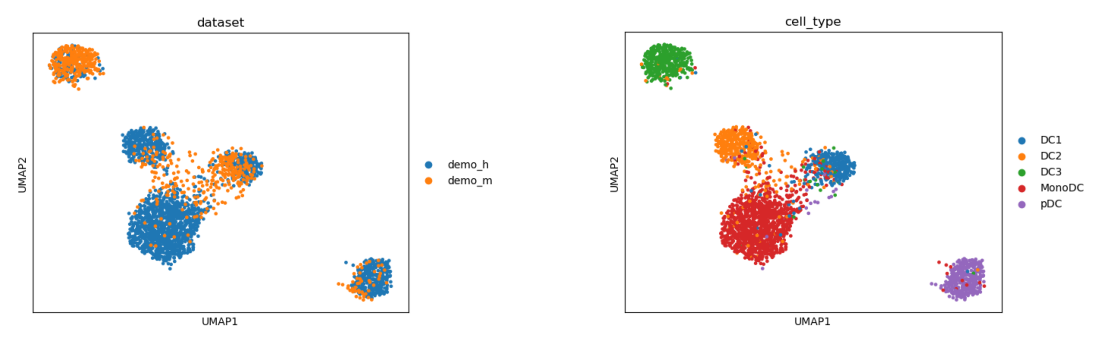

,demo_h,demo_m
sub_cell_type,,
MonoDC,1097,76
DC2,330,106
pDC,311,52
DC1,171,119
DC3,101,293


<Figure size 1400x700 with 0 Axes>

In [6]:
row = df.loc['csMAHN',:]
show_umap(row)

## umap

DC1,DC2,DC3,MonoDC,pDC
DC1,DC2,DC3,MonoDC,pDC


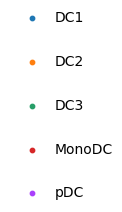

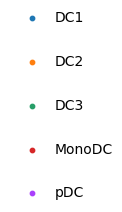

In [7]:
df_res = get_res_obs(row)
adata_umap = sc.AnnData(obs=df_res)
adata_umap.obsm['X_umap'] = df_res.loc[:,
                                       'UMAP1,UMAP2'.split(',')].to_numpy()
print(','.join(np.unique(adata_umap.obs['true_label'].unique())))
cell_type_color_map = get_color_map(
    "DC1,DC2,DC3,MonoDC,pDC".split(',')
)
print(','.join(cell_type_color_map.keys()))
show_color_map(cell_type_color_map,return_ax=False)

<Axes: >

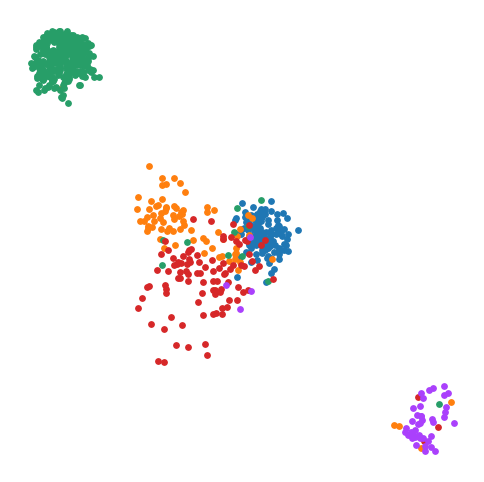

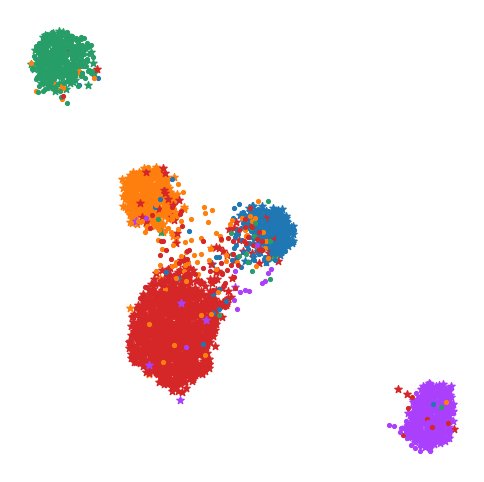

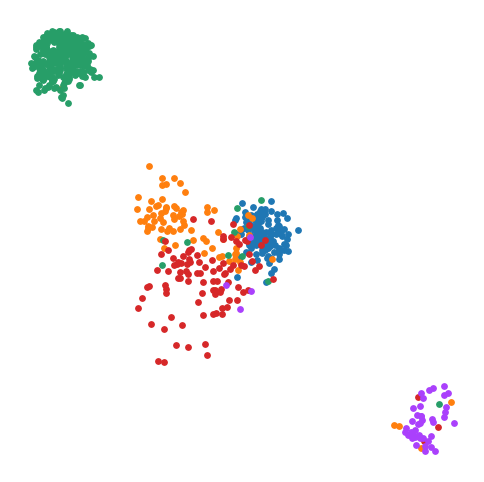

In [8]:
show_legend = False
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=60,marker='.',
          show_legend=show_legend)

fig,ax = plt.subplots(1,1,figsize = (6,6))
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'ref'],
          'true_label',
          cell_type_color_map,
          size=30,marker='*',
          show_legend=show_legend,ax=ax)
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'true_label',
          cell_type_color_map,
          size=30,marker='.',
          show_legend=show_legend,ax=ax)

# pre_label;m with marker
plot_umap(adata_umap[adata_umap.obs['dataset_type'] == 'que'],
          'pre_label',
          cell_type_color_map,
          size=60,marker='.',
          show_legend=show_legend)

## marker

In [9]:
# load_normalized_adata
adata_ref = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_ref']))
adata_que = load_normalized_adata(
    find_path_from_para(
        df_para, row['name_que']))
# load obsm['X_umap']
assert adata_que.obs.index.isin(
    df_res.query("dataset_type == 'que'").index).all()
adata_que = adata_que[df_res.query("dataset_type == 'que'").index, :]
adata_que.obs = adata_que.obs.loc[:, []].join(
    df_res.query("dataset_type == 'que'"))
adata_que.obsm['X_umap'] = df_res.query(
    "dataset_type == 'que'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

assert adata_ref.obs.index.isin(
    df_res.query("dataset_type == 'ref'").index).all()
adata_ref = adata_ref[df_res.query("dataset_type == 'ref'").index, :]
adata_ref.obs = adata_ref.obs.loc[:, []].join(
    df_res.query("dataset_type == 'ref'"))
adata_ref.obsm['X_umap'] = df_res.query(
    "dataset_type == 'ref'").loc[:, 'UMAP1,UMAP2'.split(',')].to_numpy()

df_varmap = pd.read_csv(get_path_varmap(
    map_sp[row['sp_ref']], map_sp[row['sp_que']]))
df_varmap.columns = 'gn_ref,gn_que,gn_tpye'.split(',')
df_varmap = df_varmap.dropna().filter(
    regex='^gn_.+')

df_varmap_select = df_varmap[df_varmap['gn_ref'].str.match(
    '(CSF1R)|(XCR1)|(CD1A)|(CD207)|(FSCN1)|(TCF4)', case=False)]
# filter IL6RA
df_varmap_select = df_varmap_select.query("gn_ref != 'IL6R'")

df_varmap_select = df_varmap_select.assign(
    **{
        'ref_exists': df_varmap_select['gn_ref'].apply(
            lambda x: x in adata_ref.var_names),
        'que_exists': df_varmap_select['gn_que'].apply(
            lambda x: x in adata_que.var_names),
    }
)
display(df_varmap_select)

,gn_ref,gn_que,gn_tpye,ref_exists,que_exists
10985,TCF4,Tcf4,ortholog_one2one,True,True
25995,CD207,Cd207,ortholog_one2one,True,True
42010,CSF1R,Csf1r,ortholog_one2one,True,True
50446,FSCN1,Fscn1,ortholog_one2one,True,True
68331,XCR1,Xcr1,ortholog_one2one,True,True


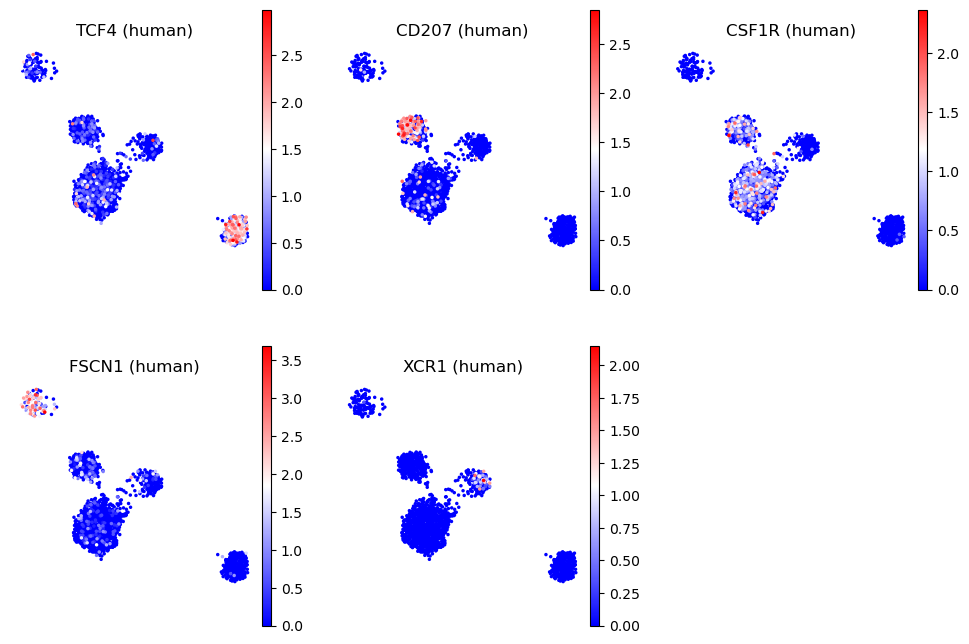

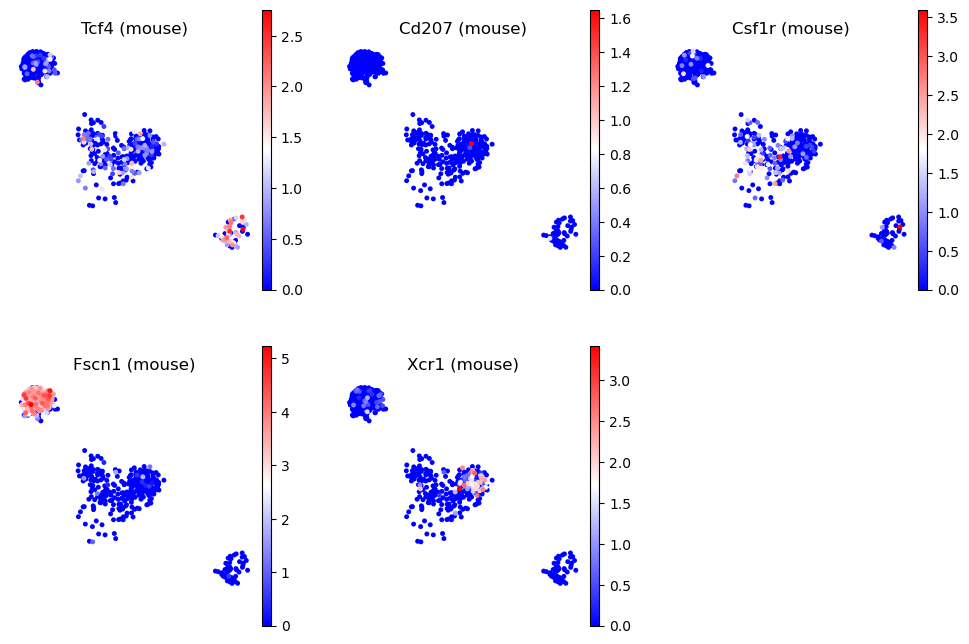

In [10]:
nrows = 2
ncols = 3
# marker ref
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "ref_exists")['gn_ref'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_ref, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=25,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (human)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
# savefig(fig, '{};{};marker;h.{}'.format(
#     item, row.name, fig_format), p_plot=p_plot_item)

# marker que
fig, axs = plt.subplots(
    nrows=nrows, ncols=ncols, figsize=(
        4*ncols, 4*nrows),)
for ax, gene in zip_longest(np.ravel(axs), df_varmap_select.query(
        "que_exists")['gn_que'], fillvalue=None):
    ax.set_aspect('equal')
    if gene:
        sc.pl.umap(adata_que, color=[gene],
                   # vmax=5,vmin=0,
                   ncols=2,
                   sort_order=True,
                   cmap='bwr',
                   size=50,
                   show=False,
                   colorbar_loc='right',
                   ax=ax,
                   frameon=False, title='{} (mouse)'.format(gene)
                   )
    else:
        fig.delaxes(ax)
# savefig(fig, '{};{};marker;m.{}'.format(
#     item, row.name, fig_format), p_plot=p_plot_item